## Part 2: Network Analysis - Visualization & Measures

<br>
<br>

<div style='text-align:center;'> Felix Z. Hoffmann </div>

<br>
<br>

Jupyter notebook at: 

## Tools for network analysis

</br>


<img style="float: right;" src="img/networkx-logo.png" width="30%">
### NetworkX 

 - Python based
 - community driven
 - most accesible tool (pip install..)
 - support for directed graphs lacking





<img style="float: right;" src="img/graph-tool-logo.png" width="40%">
### graph-tool

- Python interface, algorithms implemented in C++, making use of Boost Graph Library
- dedicated maintainer (Tiago de Paula Peixoto)
- can be difficult to install
- great support for working with directed graphs


## Many more ....

- Zenlib, Python, http://zen.networkdynamics.org/
- Brain Connectivity Toolbox, MATLAB, https://sites.google.com/site/bctnet/
- Brain Analysis using Graph Theory (BRAPH), MATLAB, http://braph.org/
- ...



In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as pl
import lib.directed_watts_strogatz as dws

import numpy as np

import graph_tool.all as gt

from lib.nx2gt import nx2gt

## Introduction to NetworkX

In [14]:
%matplotlib inline

In [7]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from(['A', 'B','C'])

In [8]:
g.nodes()

NodeView(('C', 'B', 'A'))

In [11]:
g.add_edges_from([('A','B'), ('B','C'),('C','A')])

In [12]:
g.edges()

EdgeView([('C', 'B'), ('C', 'A'), ('B', 'A')])

## Introduction to NetworkX

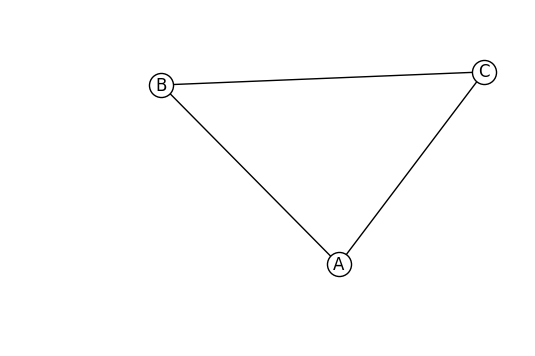

In [18]:
pl.axis('off')
nx.draw_networkx(g, node_color = 'white')


In [19]:
h = nx.DiGraph()

# do not neeed to add nodes explicitly 

h.add_edges_from([('A','B'), ('B','C'),('C','A')])

## Introduction to NetworkX

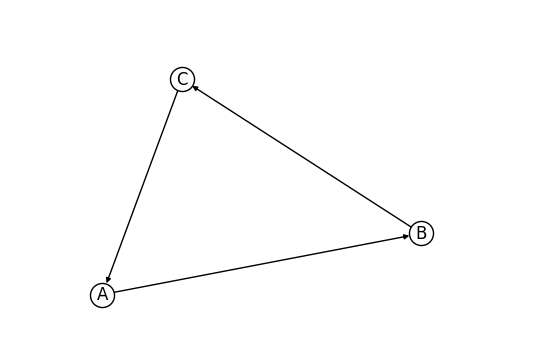

In [20]:
pl.axis('off')
nx.draw_networkx(h, node_color = 'white')

In [21]:
from IPython.core.display import HTML
HTML("""
<style>
.column {
  float: left;
  width: 33.33%;
  padding: 5px;
}

/* Clear floats after image containers */
.row::after {
  content: "";
  clear: both;
  display: table;
}
</style>
""")

In [39]:

def make_graphs(N=50,p=0.2):
    g_edr = nx.gnp_random_graph(N,p, directed=True)
    g_smw = nx.from_numpy_array(dws.watts_strogatz(N, p, 0.1, directed=True), 
                                create_using=nx.DiGraph())
    #g_scf = nx.scale_free_graph(N)
    
    x = gt.price_network(N, N*p)     
    x.save('main.gml')
    g_scf=nx.read_gml('main.gml', label='id')
    
    return (g_edr, g_smw, g_scf)

def make_graphs_gt(N=50,p=0.2):
    graphs = make_graphs(N)
    gt_s = []
    for g in graphs:
        gt_s.append(nx2gt(g))
        
    gt_s[-1] = gt.price_network(N, N*p) 
    
    gt_s[-1].save('main.gml')
    
    return gt_s

def shuffle_nodes(g):
    mapping = dict()
    N = g.number_of_nodes()
    xx=np.arange(N)
    np.random.shuffle(xx)
    for i in range(N):
        mapping={**mapping, **{i:xx[i]+N}}
    h = nx.relabel_nodes(g, mapping, copy=False)
    return h

## Analyzing networks - Visualization

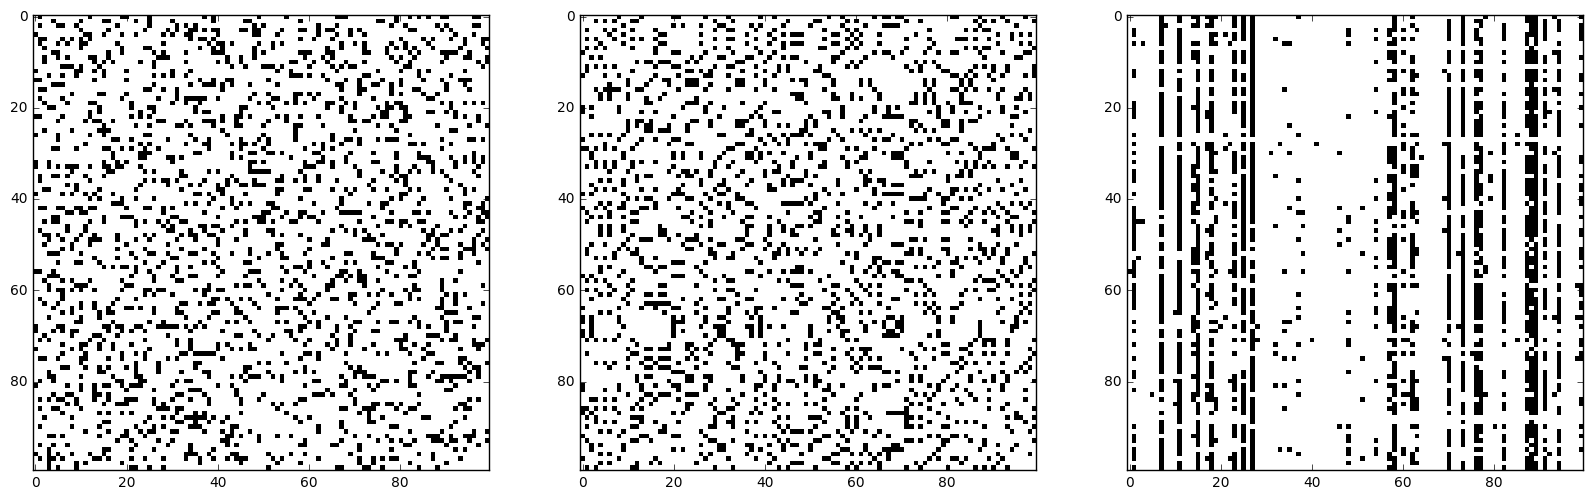

In [26]:
nets = make_graphs(N=100) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));
for g,ax in zip(nets,axs):
    g = shuffle_nodes(g)
    A=nx.to_numpy_matrix(g)
    ax.imshow(A, aspect='equal', cmap='Greys',  interpolation='nearest')

## Analyzing networks

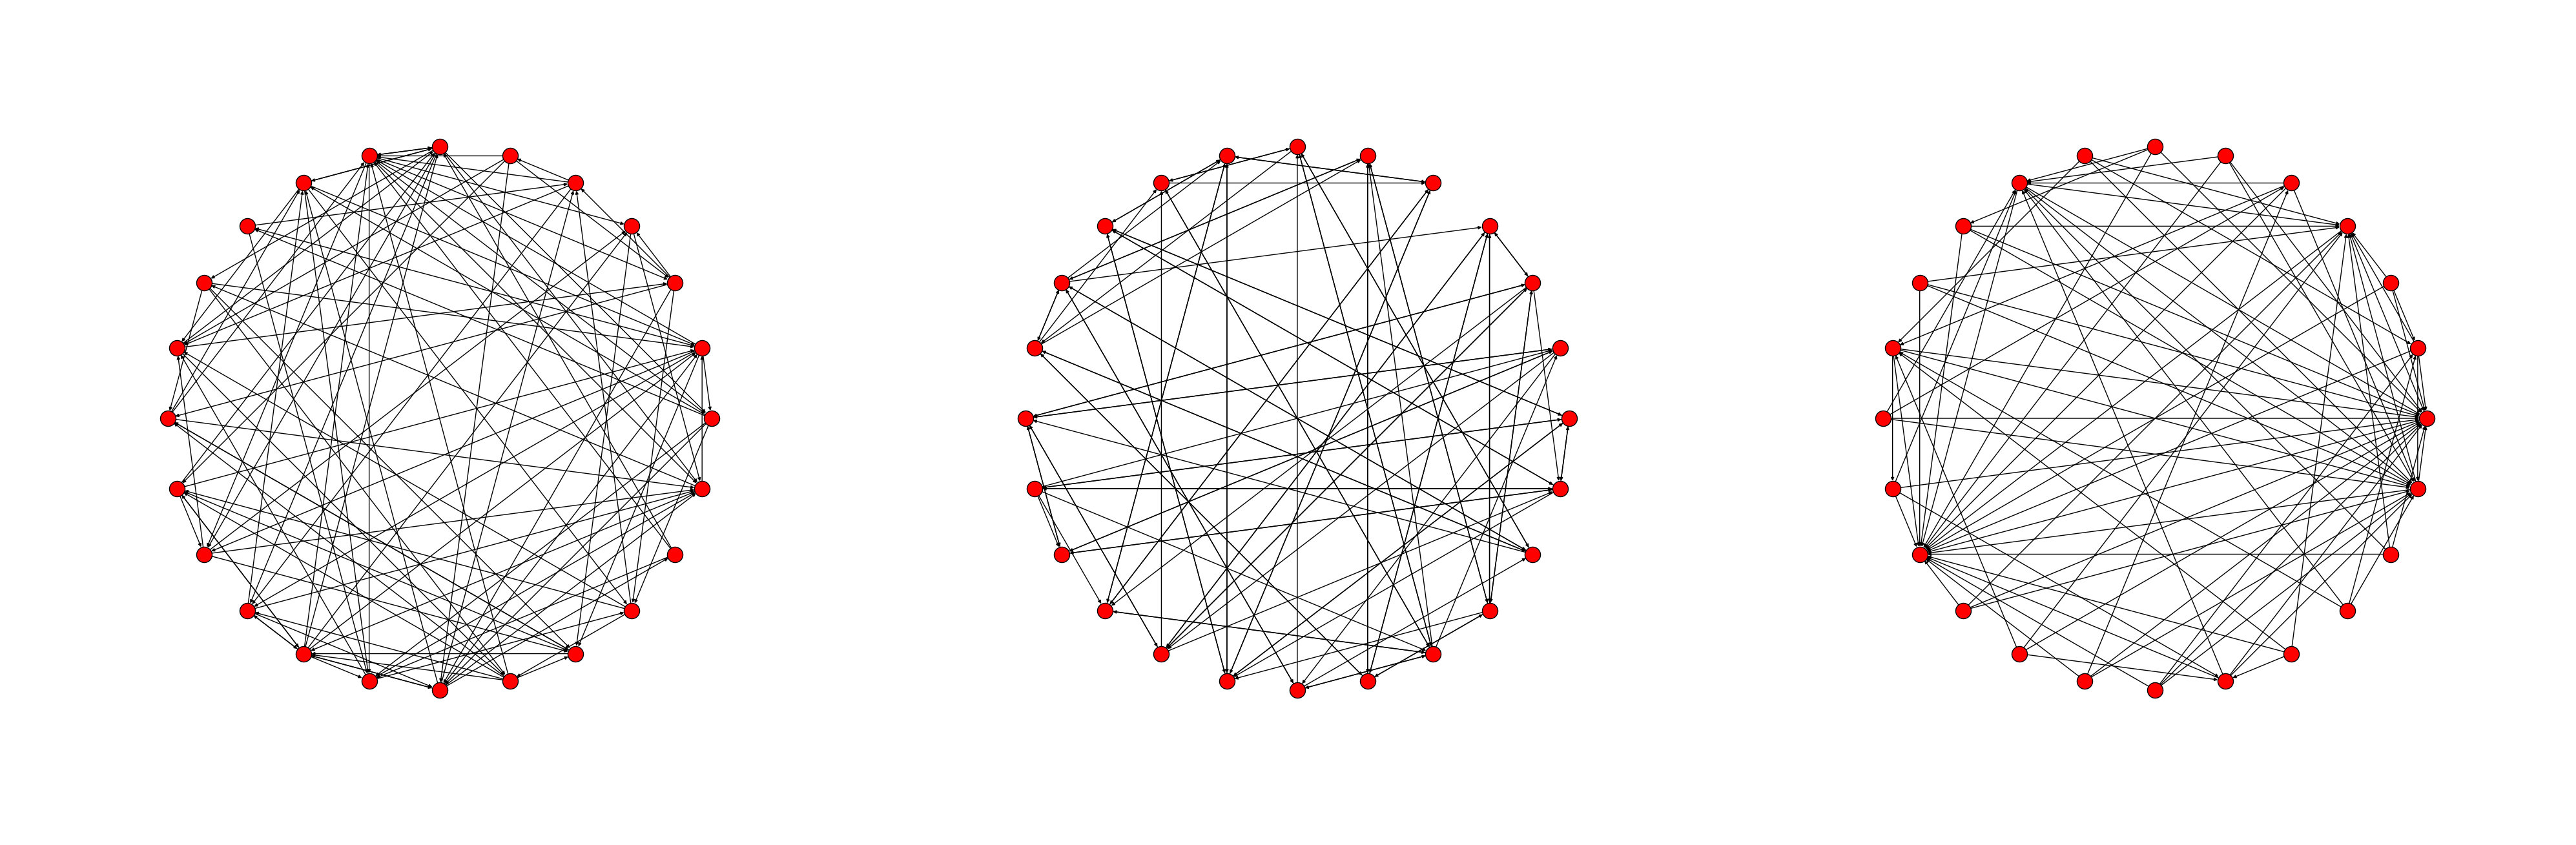

In [27]:
nets = make_graphs(N=24) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(40, 20));
for g,ax in zip(nets,axs):
    g=shuffle_nodes(g)
    ax.set_aspect('equal')
    nx.draw_circular(g, ax=ax)
pl.tight_layout()

## Analyzing networks

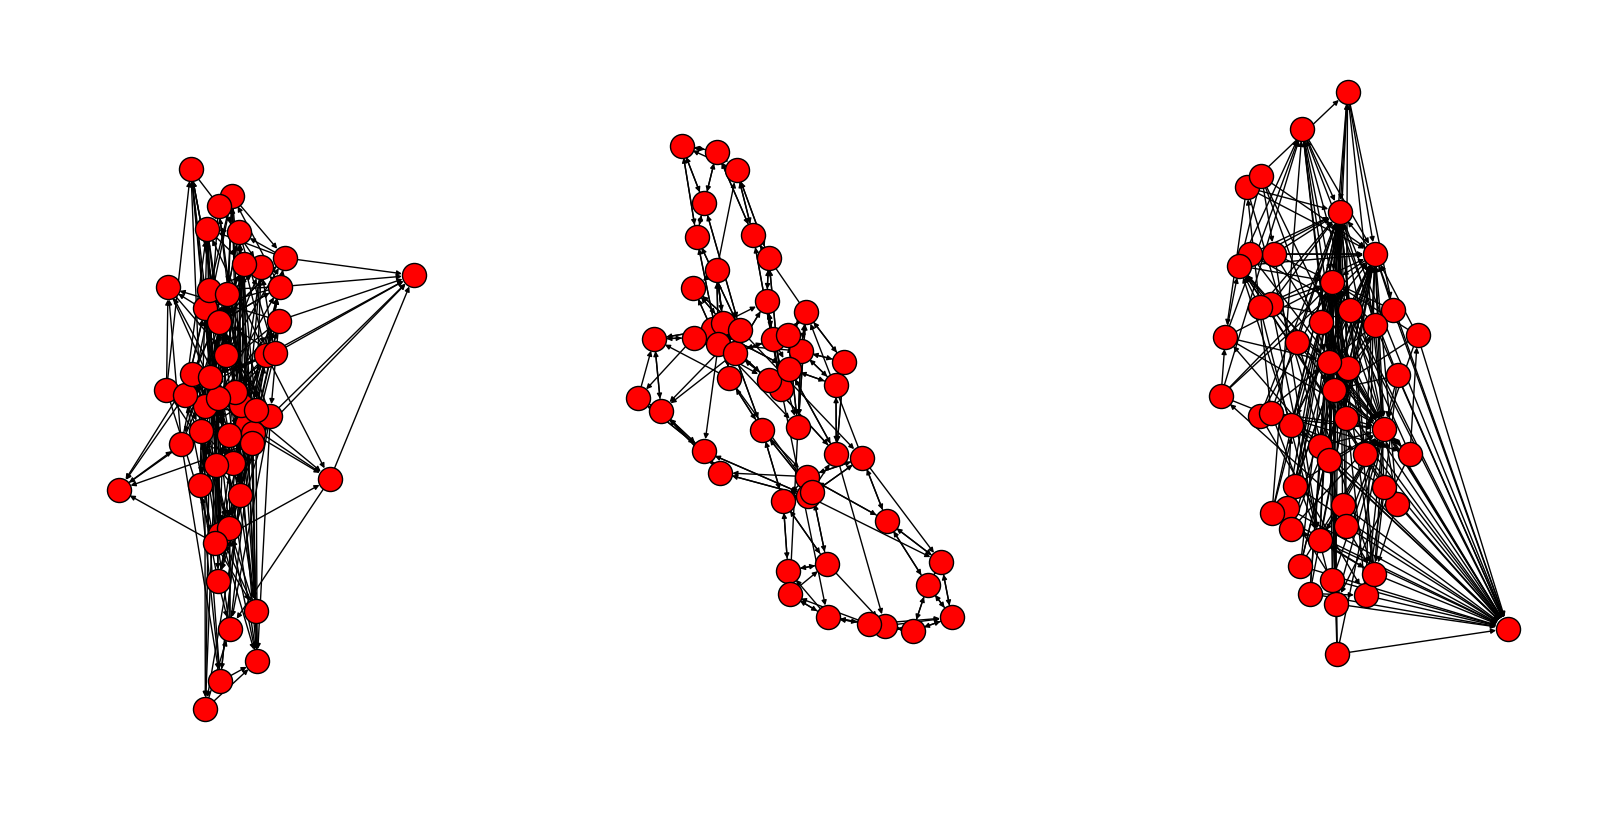

In [6]:
nets = make_graphs(p=0.1) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));
for g,ax in zip(nets,axs):
    g=shuffle_nodes(g)
    nx.draw(g, ax=ax)

## Network measures

 - <font color=red>global</font> measures pertaining the complete graph
 
 - <font color=red>local</font> measures for a single node (often look at distributions of local node measures or averages)
 
 - <font color=red>regional</font>

## Connection density

<br>

$$ \text{connection density} = \frac{\text{realized connections}}{\text{possible connections}} $$

<br>

In [33]:
nets = make_graphs(N=1000) 
for g in nets:
    print("N:", nx.number_of_nodes(g), "\t", "density:", nx.density(g))

N: 1000 	 density: 0.19946446446446447
N: 1000 	 density: 0.20014914914914914
N: 1000 	 density: 0.18008008008008008


## Connection density in neural circuits

<br>

#### Local cortical circuits

0.05-0.25 -- Song et al. (2005), Lefort et al. (2009), Perin et al. (2011)



## Connection density in neural circuits

</br>

<img style="float: center;width: 70%;" src="img/Lefort2009_Fig1DEF.png">

</br>

<div style="float:right;color:gray;">
Lefort et al. (2009)
</div>

</br>

## Connection density in neural circuits

</br>

<img style="float: center;width: 90%;" src="img/Lefort2009_Tab2.png">

</br>

<div style="float:right;color:gray;">
Lefort et al. (2009)
</div>

</br>

# Connection density in neural circuits

<br>
## Local cortical circuits

0.05-0.25 -- Song et al. (2005), Lefort et al. (2009), Perin et al. (2011)

<br>
## Brain area networks

<br>
### Mouse
 - 0.35-0.53 -- Oh et al. (2014), computational model
 - 0.73 -- Ypma and Bullmore (2014), re-analysis
 - 0.97 -- Gămănuţ et al. (2018)

### Macaque
 - 0.66 --- Markov et al. (2014)

## In- and out-degree distributions   - <font color=red>local measure</font>



In [9]:
def simple_graph():

    G = nx.DiGraph()

    G.add_edges_from(
        [('A', 'B'), ('A', 'C'), ('H', 'A'), ('G', 'A'), ('F', 'A')])

    val_map = {'A': 1.0,
               'D': 0.5714285714285714,
               'H': 0.0}

    values = [val_map.get(node, 0.25) for node in G.nodes()]

    pl.axis('off')
    nx.draw_networkx(G, node_color = 'white')

    return G

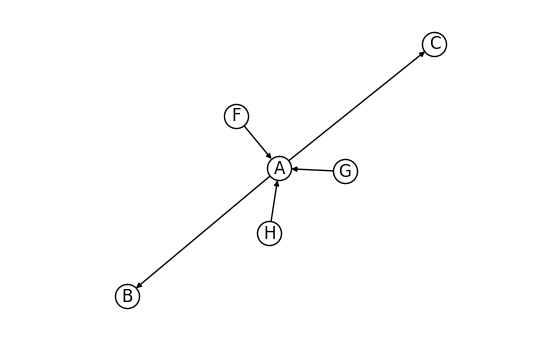

In [12]:
g = simple_graph()

In [15]:
g.in_degree('A'), g.out_degree('A')

(3, 2)

## In- and out-degree distributions  - <font color=red>local measure</font>


**In-degree** of a node is the number of <font color=red>incoming</font> connections

**Out-degree** of a node is the number of <font color=red>outgoing</font> connections

<br>

 In undirected graphs
 
 $$ \text{In-degree} = \text{out-degree}$$

<br>

Consistency: Equal number of "heads" and "tails" across graph matches

$$ \sum_{v \in V} \deg^-(v) = \sum_{v \in V} \deg^+(v) $$

## In-degree distributions

In [41]:
pl.style.use('ggplot')

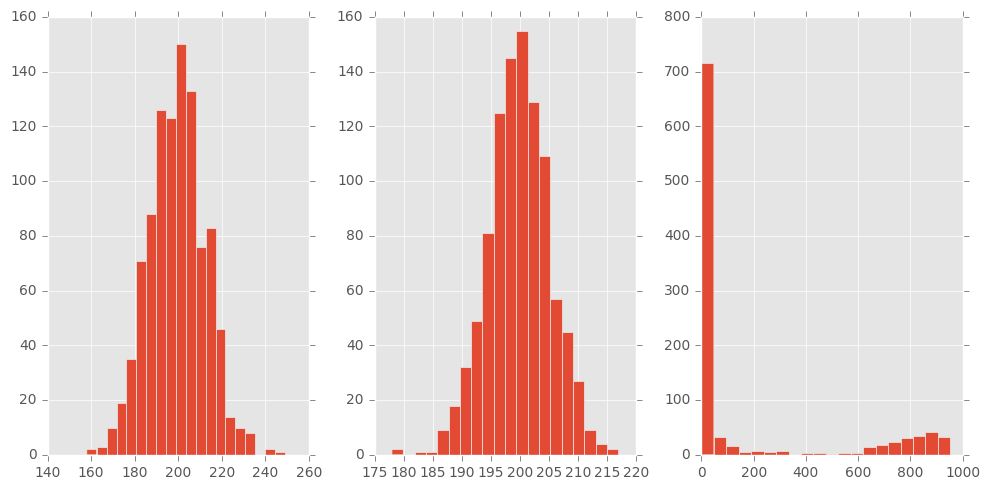

In [14]:
nets = make_graphs(N=1000) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    ax.hist([x[1] for x in g.in_degree()], bins=20)
pl.tight_layout()

## Out-degree distributions

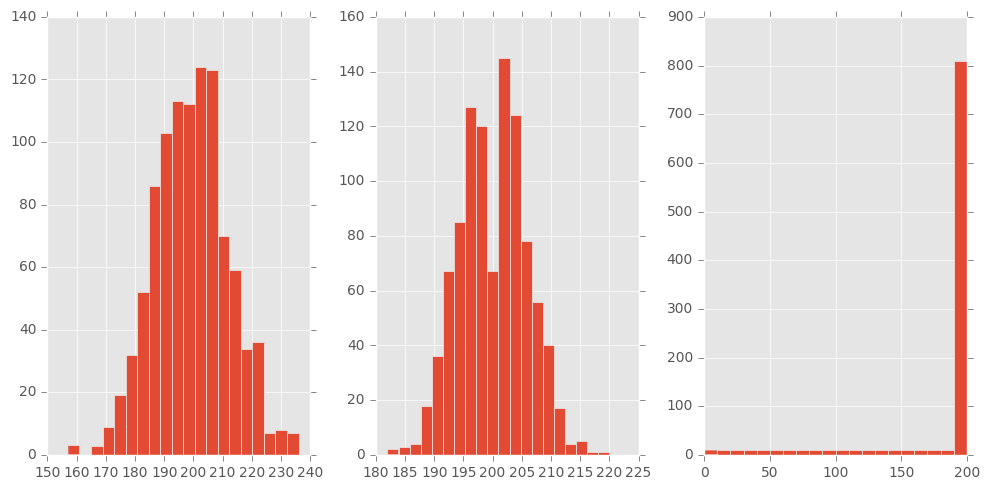

In [15]:
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    ax.hist([x[1] for x in g.out_degree()], bins=20)
pl.tight_layout()

# Degree distributions in the brain

<br>
## Theoretical studies
<br>
### Roxin (2011) 
Effect of broadening in-degree and out-degree distributions in recurrent networks

<br>
### Martens et al. (2017)

Anti-correlated degree distributions increased network stability and had highest performance in detecting stimuli

## Degree distributions in the brain - Martens et al. (2017)

<br>

 <div class="row">
  <div class="column" style="width:49%">
    <img src="img/Martens2017_Fig2A.png" alt="Fjords" style="width:100%">
  </div>
  <div class="column" style="width:49%">
    <img src="img/Martens2017_Fig6B.png" alt="Forest" style="width:100%">
  </div>
</div> 

<br>

<div style="float:right;color:gray;">
Martens et al. (2017)
</div>

<br>

## Clustering


In [33]:
def simple_graph():

    G = nx.DiGraph()

    G.add_nodes_from([1,2,3,4])
    
    G.add_edges_from(
        [(1, 2), (1, 3), (1, 4), (3, 2), (3, 4)])


    pl.axis('off')
    nx.draw_networkx(G, node_color = 'white', edge_color='black')

    return G

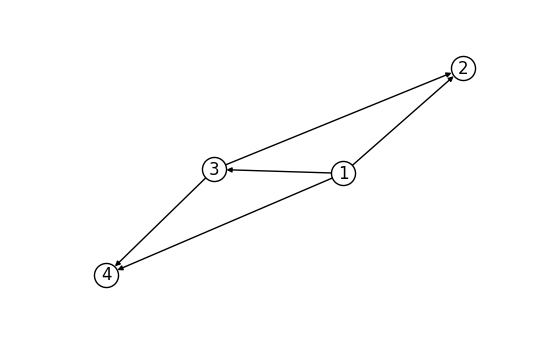

In [37]:
g = simple_graph()

In [35]:
h=nx2gt(g)

In [36]:
list(gt.local_clustering(h, undirected=False))

[0.3333333333333333, 0.0, 0.0, 0.0]

## Clustering

<p>The local clustering coefficient $c_i$ is
defined as</p>

$$c_i = \frac{|\{e_{jk}\}|}{k_i(k_i-1)} :\, v_j,v_k \in N_i,\, e_{jk} \in E$$
where $k_i$ is the out-degree of vertex $i$, and

$$N_i = \{v_j : e_{ij} \in E\}$$

<p>is the set of out-neighbors of vertex $i$.

<div style="float:right;color:gray;">
Watts and Strogatz (1998)
</div>

## Clustering

0.36015931086427566
0.6516422332814018
0.4867316470895883


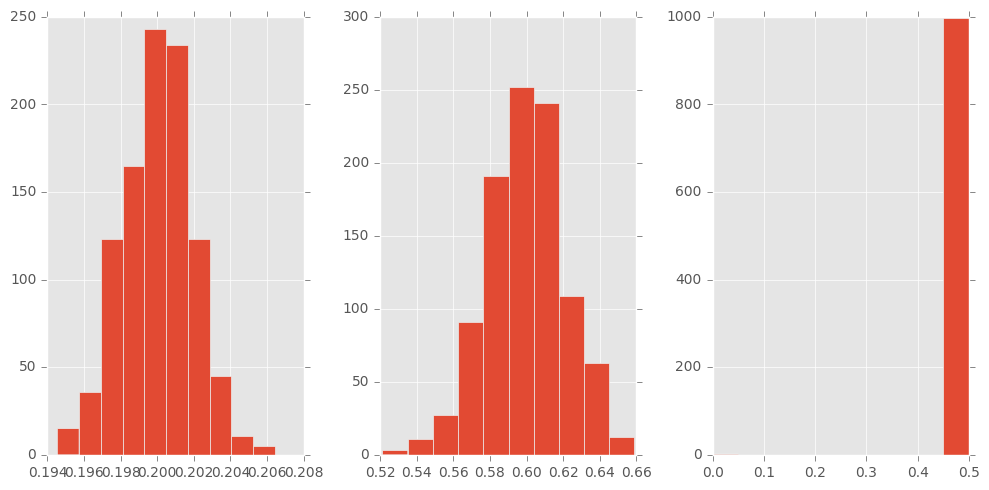

In [42]:
nets = make_graphs_gt(N=1000) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    print(gt.global_clustering(g)[0])
    ax.hist(list(gt.local_clustering(g, undirected=False)))
pl.tight_layout()

## Shortest Paths

In [50]:
def simple_graph():

    G = nx.DiGraph()

    G.add_edges_from(
        [('A', 'B'), ('A', 'C'), ('D', 'G'), ('E', 'C'), ('H', 'D'),
         ('B', 'H'), ('B', 'F'), ('C', 'H'),('F','D')])

    val_map = {'A': 1.0,
               'D': 0.5714285714285714,
               'H': 0.0}

    values = [val_map.get(node, 0.25) for node in G.nodes()]

    pl.axis('off')
    nx.draw_networkx(G, node_color = 'white', edge_color='black')

    return G

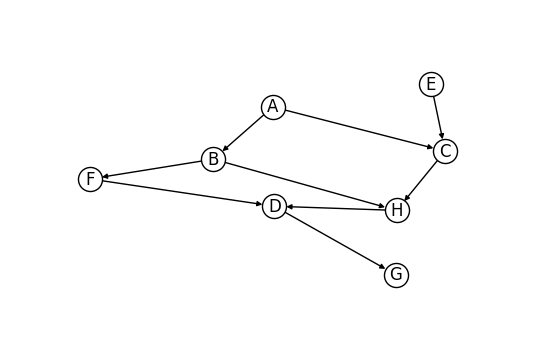

In [51]:
G = simple_graph()

In [53]:
nx.shortest_path(G, 'A', 'G')

['A', 'B', 'F', 'D', 'G']

In [54]:
nx.shortest_path_length(G,'A','G')

4

## Shortest Paths

In [68]:
g=gt.Graph()
g.add_vertex(3);
g.add_edge(g.vertex(0),g.vertex(1))
g.add_edge(g.vertex(1),g.vertex(2))
counts, bins = gt.distance_histogram(g)
print(np.mean((bins[1:]+1)*counts/sum(counts)))

1.11111111111


1.79968468468
1.80014314314
1.43704912917


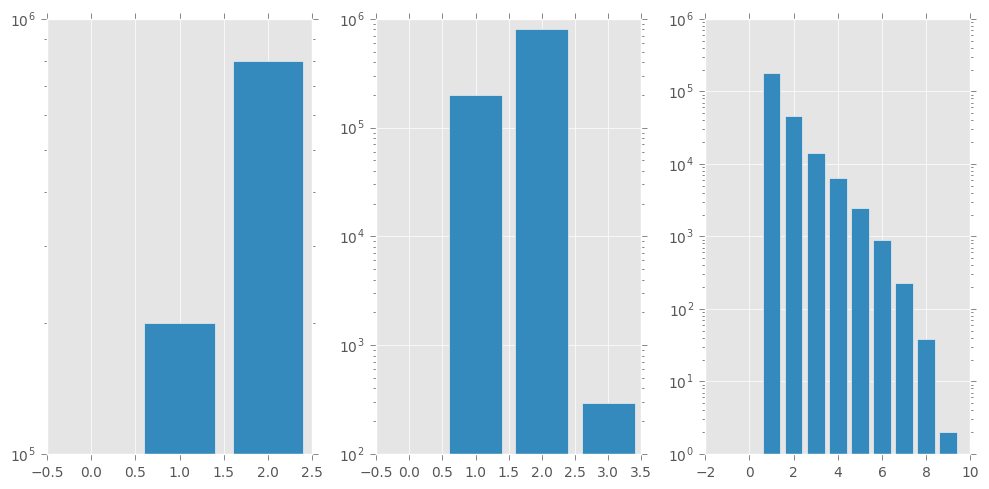

In [43]:
nets = make_graphs_gt(N=1000)
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    counts, bins = gt.distance_histogram(g)
    ax.bar(bins[:-1], counts, align='center')
    print(np.sum((bins[:-1])*counts)/np.sum(counts))
    ax.set_yscale('log')
pl.tight_layout()

## Shortest Paths - Handling unconnected pairs

several methods suggested:

- does not contribute to average path length
- distance = 0
- distance = N
- distance = $\infty$

## Hierarchy

https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.hierarchy.flow_hierarchy.html

In [52]:
def simple_graph1():

    G = nx.DiGraph()

    G.add_edges_from(
        [('A', 'B'), ('B', 'C'), ('C', 'D'), ('B', 'D'), ('D', 'C'),
         ('C', 'A'), ('B', 'E'), ('A', 'E'),('F','G'), ('G','H'), ('H','I'), ('I','G'), 
         ('B','I')])

    pl.axis('off')
    nx.draw_networkx(G, node_color = 'white', edge_color='black')

    return G

def simple_graph2():

    G = nx.DiGraph()

    G.add_edges_from(
        [('A', 'E'), ('A', 'F'), ('A', 'D'), ('B', 'D'), ('D', 'C'),
         ('C', 'A'), ('B', 'E'), ('A', 'E'),('F','G'), ('G','H'), ('H','I'), ('I','G'), 
         ('B','I')])

    pl.axis('off')
    nx.draw_networkx(G, node_color = 'white', edge_color='black')

    return G

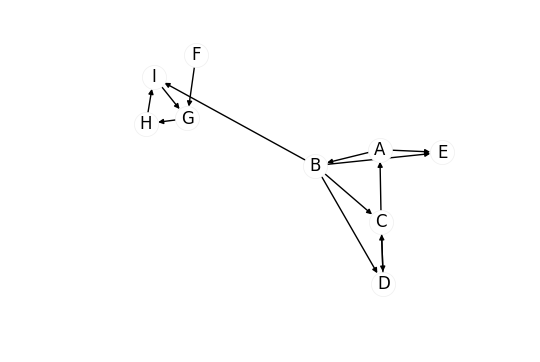

In [50]:
g = simple_graph1()

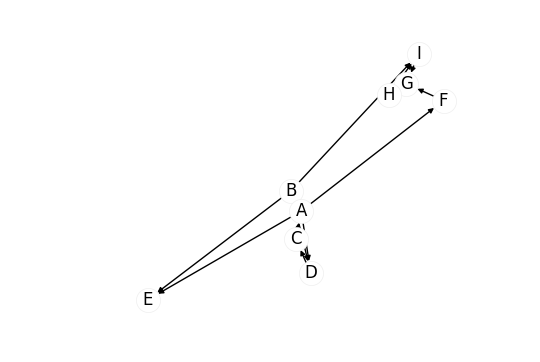

In [53]:
g = simple_graph2()

## Modularity

graph tool cookbook on modularity: https://graph-tool.skewed.de/static/doc/dev/demos/inference/inference.html?highlight=partition

networkx communities https://networkx.github.io/documentation/stable/reference/algorithms/community.html

graph tool modularity documentation https://graph-tool.skewed.de/static/doc/dev/inference.html#graph_tool.inference.modularity




## Other - Resources - Exercises?

C Elegans data set in graph tool: "celegansneural" in https://graph-tool.skewed.de/static/doc/collection.html

## References

1. Martens, M. B., Houweling, A. R. & Tiesinga, P. H. E. Anti-correlations in the degree distribution increase stimulus detection performance in noisy spiking neural networks. J Comput Neurosci 42, 87–106 (2017).
2. Markov, N. T. et al. A Weighted and Directed Interareal Connectivity Matrix for Macaque Cerebral Cortex. Cereb Cortex 24, 17–36 (2014).
3. Ypma, R. J. F. & Bullmore, E. T. Statistical Analysis of Tract-Tracing Experiments Demonstrates a Dense, Complex Cortical Network in the Mouse. PLOS Computational Biology 12, e1005104 (2016).
4. Oh, S. W. et al. A mesoscale connectome of the mouse brain. Nature 508, 207–214 (2014).
5. Lefort, S., Tomm, C., Floyd Sarria, J.-C. & Petersen, C. C. H. The Excitatory Neuronal Network of the C2 Barrel Column in Mouse Primary Somatosensory Cortex. Neuron 61, 301–316 (2009).
6. Roxin, A. The Role of Degree Distribution in Shaping the Dynamics in Networks of Sparsely Connected Spiking Neurons. Front Comput Neurosci 5, (2011).
7. Song, S., Sjöström, P. J., Reigl, M., Nelson, S. & Chklovskii, D. B. Highly Nonrandom Features of Synaptic Connectivity in Local Cortical Circuits. PLoS Biol 3, e68 (2005).
8. Perin, R., Berger, T. K. & Markram, H. A synaptic organizing principle for cortical neuronal groups. PNAS 108, 5419–5424 (2011).


In [ ]:
# overflow

nets = make_graphs_gt(N=50) 
#pl.switch_backend('cairo')
#fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));

#for g,ax in zip(nets,axs):

#fig=pl.figure()
#ax=fig.add_subplot(111)
for k in range(3):
    pos=gt.random_layout(nets[-2],0)
    gt.graph_draw(nets[-2],pos=pos)#, mplfig=ax);
    
#fig.savefig('new.png')